# Проект по теме "Основы машинного обучения" - Удержание клиентов Фитнес-центра.

# Содержание
1. [Загрузка данных](#start)
2. [Исследовательский анализ данных](#EDA)<br>
    2.1 [Изучение датасета, средние значения и стандартные отклонения](lear)<br>
    2.2 [Средние значения признаков в двух группах](#avr)<br>
    2.3 [Столбчатые гистограммы и распределения признаков](#hist)<br>
    2.4 [Матрица корреляций](#corr)<br>
3. [Построение модели прогнозирования оттока клиентов](#prog)<br>
    3.1 [Разбиение данных на обучающую и валидационную выборки](#div)<br>
    3.2 [Модели "Логистическая регрессия" и "Случайный лес" и расчет метрик](#forest)<br>
    3.3 [Оценка метрик](#mark)<br>
4. [Кластеризация клиентов](#claster)<br>
    4.1. [Стандартизация данных](#standard)<br>
    4.2. [Матрица расстояний](#matrix)<br>
    4.3. [Кластеризации по алгоритму K-Means и прогнозирование кластеров клиентов](#kmeans)<br>
    4.4. [Средние значения признаков для кластеров](#mean)<br>
    4.5. [Распределения признаков для кластеров](#clasterr)<br>
    4.6. [Доли оттока в кластерах](#distr)<br>
5. [Выводы и базовые рекомендации по работе с клиентами](#recommendation)<br>

<b> Описание проекта </b> <br>
Задача<br>

Сеть фитнес-центров «Культурист-датасаентист» разрабатывает стратегию взаимодействия с клиентами на основе аналитических данных.

Распространённая проблема фитнес-клубов и других сервисов — отток клиентов. br>

Для фитнес-центра можно считать, что клиент попал в отток, если за последний месяц ни разу не посетил спортзал.<br>

Чтобы бороться с оттоком, отдел по работе с клиентами «Культуриста-датасаентиста» перевёл в электронный вид множество клиентских анкет. Задача — провести анализ и подготовить план действий по удержанию клиентов.

А именно:
научиться прогнозировать вероятность оттока (на уровне следующего месяца) для каждого клиента;<br>
сформировать типичные портреты клиентов: выделить несколько наиболее ярких групп и охарактеризовать их основные свойства;<br>
проанализировать основные признаки, наиболее сильно влияющие на отток;<br>
сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами:<br>
1) выделить целевые группы клиентов;<br>
2) предложить меры по снижению оттока;<br>
3) определить другие особенности взаимодействия с клиентами.<br>


<b>Описание данных</b> <br>
Данные клиента за предыдущий до проверки факта оттока месяц:<br>
'gender' — пол;<br>
'Near_Location' — проживание или работа в районе, где находится фитнес-центр;<br>
'Partner' — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);<br>
Promo_friends — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);<br>
'Phone' — наличие контактного телефона;<br>
'Age' — возраст;<br>
'Lifetime' — время с момента первого обращения в фитнес-центр (в месяцах).<br>

Информация на основе журнала посещений, покупок и информация о текущем статусе а бонемента клиента:<br>
'Contract_period' — длительность текущего действующего абонемента (месяц, 3 месяца, 6 месяцев, год);<br>
'Month_to_end_contract' — срок до окончания текущего действующего абонемента (в месяцах);<br>
'Group_visits' — факт посещения групповых занятий;<br>
'Avg_class_frequency_total' — средняя частота посещений в неделю за все время с начала действия абонемента;<br>
'Avg_class_frequency_current_month' — средняя частота посещений в неделю за предыдущий месяц;<br>
'Avg_additional_charges_total' — суммарная выручка от других услуг фитнес-центра: кафе, спорт-товары, косметический и массажный салон.<br>

<a id="start"></a>
### Загрузка данных

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from IPython.display import display
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, silhouette_score
from sklearn.ensemble import RandomForestClassifier
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from plotly import graph_objects as go
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/datasets/gym_churn.csv')
df.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [3]:
# Приведем названия столбцов к нижнему регистру
df.columns = df.columns.str.lower()

<a id="EDA"></a>
### Исследовательский анализ данных.

<a id="lear"></a>
#### Изучение датасета, средние значения и стандартные отклонения

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   near_location                      4000 non-null   int64  
 2   partner                            4000 non-null   int64  
 3   promo_friends                      4000 non-null   int64  
 4   phone                              4000 non-null   int64  
 5   contract_period                    4000 non-null   int64  
 6   group_visits                       4000 non-null   int64  
 7   age                                4000 non-null   int64  
 8   avg_additional_charges_total       4000 non-null   float64
 9   month_to_end_contract              4000 non-null   float64
 10  lifetime                           4000 non-null   int64  
 11  avg_class_frequency_total          4000 non-null   float

In [5]:
# Приведем месяц к целочисленному типу.
df['month_to_end_contract'] = df['month_to_end_contract'].astype('int')

In [6]:
# Проверим на дуюликаты
df.duplicated().sum()

0

In [7]:
# Посмотрим на средние значения и отклонения
df.describe()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


В данных нет пропусков, нет дубликатов, можно приступать к ислледованию.

<a id="avr"></a>
#### Средние значения признаков в двух группах

In [8]:
print('Отток:')
print(df[df['churn']==1].describe())
print('\nОставшиеся клиенты:')
print(df[df['churn']==0].describe())

Отток:
            gender  near_location      partner  promo_friends        phone  \
count  1061.000000    1061.000000  1061.000000    1061.000000  1061.000000   
mean      0.510839       0.768143     0.355325       0.183789     0.902922   
std       0.500118       0.422217     0.478837       0.387495     0.296204   
min       0.000000       0.000000     0.000000       0.000000     0.000000   
25%       0.000000       1.000000     0.000000       0.000000     1.000000   
50%       1.000000       1.000000     0.000000       0.000000     1.000000   
75%       1.000000       1.000000     1.000000       0.000000     1.000000   
max       1.000000       1.000000     1.000000       1.000000     1.000000   

       contract_period  group_visits          age  \
count      1061.000000   1061.000000  1061.000000   
mean          1.728558      0.268615    26.989632   
std           2.132371      0.443448     2.895163   
min           1.000000      0.000000    18.000000   
25%           1.000000   

Вывод на основе отличий признаков у клиентов, попавших в отток и оставшихся:

Распределение по гендеру не отличается.<br>
Клиенты, которые жтвут ближе к фитнес-центру реже попадают в отток.<br>
Сотрудники компаний-партнеров клуба реже перестают посещать фитнесс-клуб.<br>
Клиенты, которые впервые пришли по акции "Приведи друга" в два раза реже уходят в отток.<br>
Наличие мобильного номера клиента не влияет на отток.<br>
Средняя длительность договора больше у оставшихся пользователей.<br>
На групповые занятия чаще ходят оставшиеся пользователи.<br>
У групп есть разница в среднем возрасте клиентов.<br>
Есть небольшое различие в выручке от других услуг фитнес-центра<br>
Оставшееся время до окончания срока действия договора у оставшихся клиентов.<br>
У клиентов в оттоке меньше среднее количество посещений в неделю за всё время<br>
Количество посещений в предыдущий месяц в два раза ниже у клиентов в оттоке<br>

<a id="hist"></a>
#### Столбчатые гистограммы и распределения признаков.

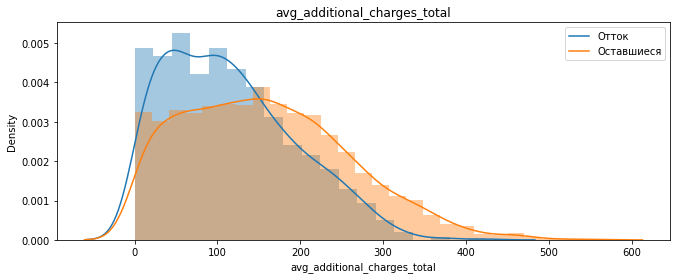

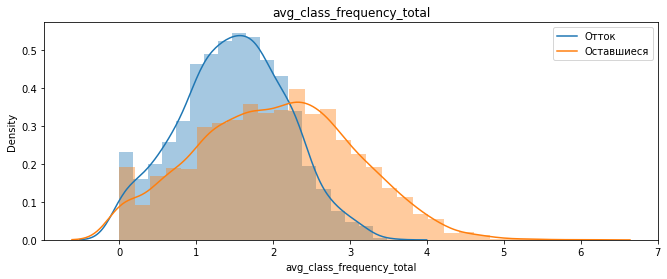

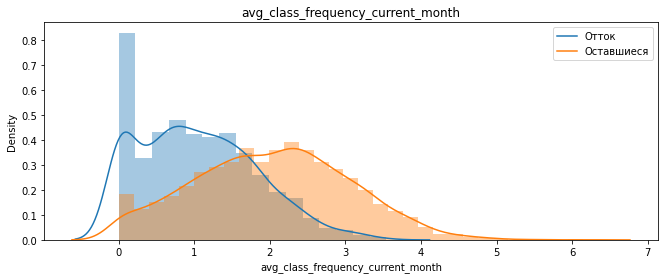

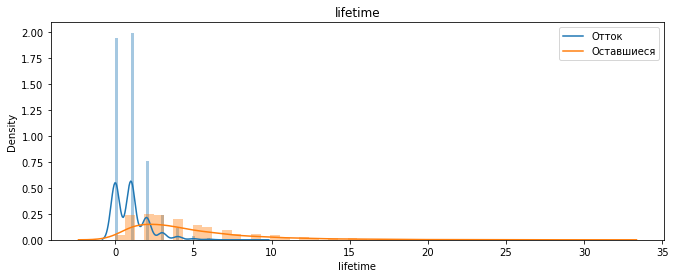

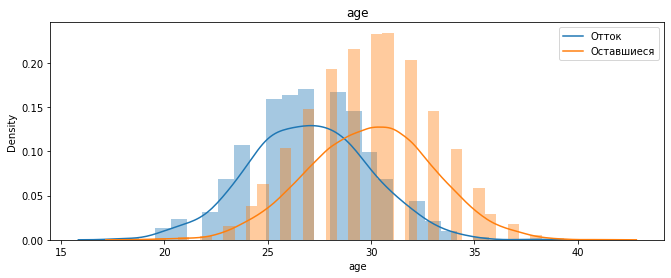

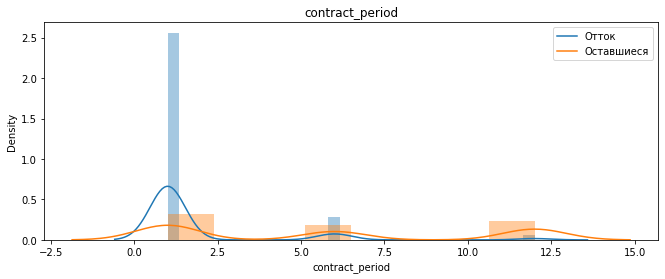

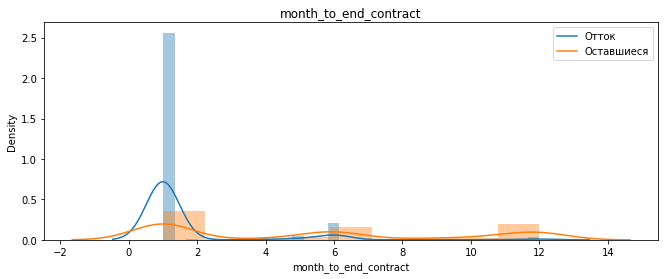

In [9]:
leave = df[df['churn']==1]
stayed = df[df['churn']==0]
distplot_columns = ['avg_additional_charges_total', 'avg_class_frequency_total', 
                    'avg_class_frequency_current_month', 'lifetime', 'age', 
                    'contract_period', 'month_to_end_contract']
for column in distplot_columns: 
    plt.figure(figsize=(11,4)) 
    plt.title(column)
    sns.distplot(leave[column])
    sns.distplot(stayed[column])
    plt.legend(['Отток', 'Оставшиеся'])
    plt.show()

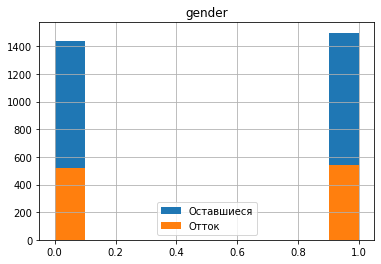

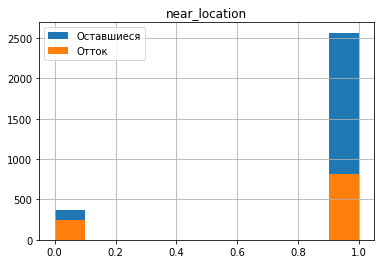

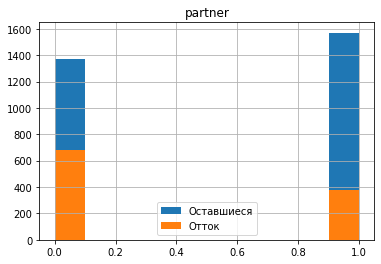

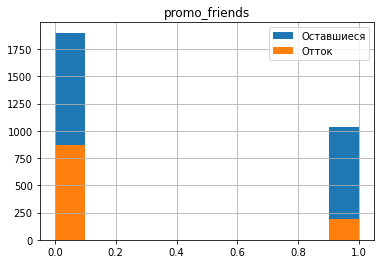

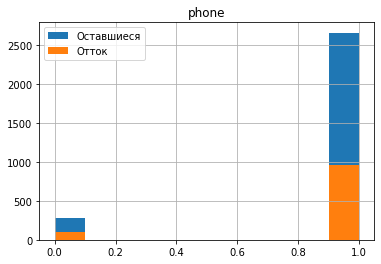

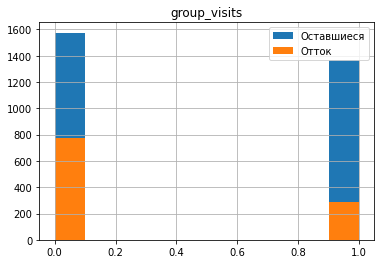

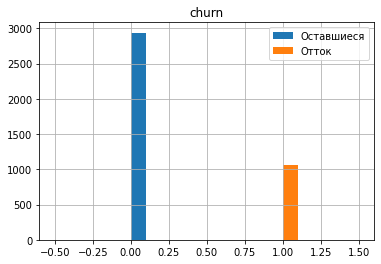

In [10]:
for column in df.columns:
    if column not in distplot_columns:
        df.groupby('churn')[column].hist()
        plt.title(column)
        plt.legend(['Оставшиеся', 'Отток'])
        plt.show()

'avg_additional_charges_total' - доля тех, кто ушел/остался мало зависят от трат на доп.услуги<br>
'avg_class_frequency_total' - те, кто ходит до 2 раз в неделю доли оттока примерно одинаковые, но если клиент ходит 3 разаи больше раз, то оттока не видно. Но таких клиентов не много<br>
'avg_class_frequency_current_month' - что более регулярно клиент ходил в зал за последний месяц, тем отток меньше<br>
'lifetime' - у клиентов с большим "lifetime" оттока почти нет<br>
'age' - кдиенты в возрасте 25-27лет чаще уходят, чем клиенты более старшего возраста<br>
'month_to_end_contract' - видно из графика, что чем больше времени осталось до окончания абонемента, тем чаще клиенты посещают салон<br>

'gender' - мужчин больше, чем женщин, но отток примерно одинаковый<br>
'near_location' - среди клиентов доля оставшихся больше среди живущих рядом<br>
'partner' - те кто участвовал в партнерской программе предпочитают продолжать ходить в фитнес<br>
'promo_friends' - участников акции значительно меньше, но доля оставшихся среди них больше<br>
'phone' - видно, что многие оставили свой телефон, но визуально на отток это не влияет<br>
'group_visits' - клиенты, посещающие групповые занятие предпочитают с большей долей оставаться<br>



<a id="corr"></a>
#### Матрица корреляций

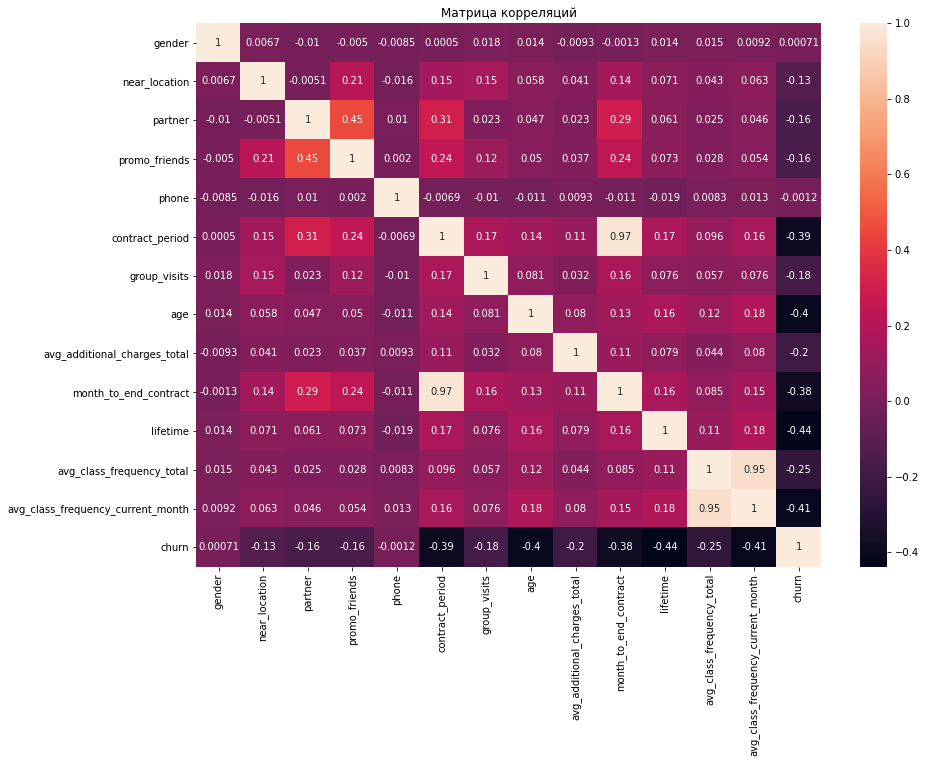

In [11]:
matr = df.corr()
plt.figure(figsize=(14,10))
sns.heatmap(matr, annot=True, square=False)
plt.title('Матрица корреляций')
plt.show()

По матрице корреляции можно сказать, что почти все признаки слабо коррелируют<br>
Сильную корреляцию пар признаков имеют 'contract_period' и 'month_to_end_contract', которую надо будет учесть в моделях линейной регрессии.

<a id="prog"></a>
### Построение модели прогнозирования оттока клиентов

<a id="div"></a>
#### Разбиение данных на обучающую и валидационную выборки

In [12]:
X = df.drop('churn', axis=1)
y = df['churn'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#создадим объект класса StandardScaler
scaler = StandardScaler()
X_train_st = scaler.fit_transform(X_train) 
display(X_train_st[:5])

#применяем стандартизацию к матрице признаков для тестовой выборки
X_test_st = scaler.transform(X_test) 

array([[-1.01511421,  0.4175068 ,  1.03175391,  1.4800097 ,  0.31628211,
         1.60502986, -0.84769226,  0.57944798,  0.37161711,  1.59173796,
         1.12734972,  1.75580418,  1.61822807],
       [-1.01511421,  0.4175068 , -0.96922337, -0.67567125,  0.31628211,
        -0.81299073, -0.84769226,  0.27046055, -1.09697378, -0.79568246,
         5.88138322, -0.2239674 , -0.01340886],
       [ 0.98511083,  0.4175068 ,  1.03175391, -0.67567125,  0.31628211,
         1.60502986, -0.84769226, -0.65650171, -1.18374157,  1.83048   ,
         0.3350108 , -0.84308456, -0.80541199],
       [-1.01511421,  0.4175068 ,  1.03175391,  1.4800097 ,  0.31628211,
         0.28610954, -0.84769226, -0.96548914, -0.95158829,  0.39802775,
         1.39146269,  0.66771379,  0.64605224],
       [-1.01511421,  0.4175068 , -0.96922337, -0.67567125, -3.16173427,
        -0.81299073, -0.84769226, -0.03852687,  0.97190435, -0.79568246,
         0.07089783, -0.19587934, -0.16038147]])

<a id="forest"></a>
####  Модели "Логистическая регрессия" и "Случайный лес" и расчет метрик

In [13]:
lr_model = LogisticRegression(random_state=0)
lr_model.fit(X_train_st, y_train)
lr_predictions = lr_model.predict(X_test_st)
lr_probabilities = lr_model.predict_proba(X_test_st)[:,1]
print('Модель прогнозирования - "Логистическая регрессия":')
print('accuracy_score: {}\nprecision_score: {}\nrecall_score:{}'.format(
    accuracy_score(y_test, lr_predictions),
    precision_score(y_test, lr_predictions),
    recall_score(y_test, lr_predictions)
))

rf_model = RandomForestClassifier(n_estimators = 100, random_state = 0) 
rf_model.fit(X_train_st, y_train)
rf_predictions = rf_model.predict(X_test_st)
rf_probabilities = rf_model.predict_proba(X_test_st)[:,1]
print('\nМодель прогнозирования - "Случайный лес":')
print('accuracy_score: {}\nprecision_score: {}\nrecall_score:{}'.format(
    accuracy_score(y_test, rf_predictions),
    precision_score(y_test, rf_predictions),
    recall_score(y_test, rf_predictions)
))

Модель прогнозирования - "Логистическая регрессия":
accuracy_score: 0.9225
precision_score: 0.8541666666666666
recall_score:0.8282828282828283

Модель прогнозирования - "Случайный лес":
accuracy_score: 0.915
precision_score: 0.8385416666666666
recall_score:0.8131313131313131


<a id="mark"></a>
####  Оценка метрик

Параметр Accuracy логистической регрессии (0,922) немного выше, чем у случайного леса (0,915). Precision и recall также выше у логистичесой регрессии.

Можно заметить, что у обоих моделей высокие показатели. 

Доля правильных прогнозов немного выше в модели логистической регрессии, поэтому модель логистической регрессии показала себя лучше.

<a id="claster"></a>
### Кластеризация клиентов

<a id="standard"></a>
#### Стандартизация данных

In [14]:
sc = StandardScaler()
X_sc = sc.fit_transform(X)
X_sc[:3]

array([[ 0.97970588,  0.42788074,  1.02686062,  1.49716101, -3.05985201,
         0.28989014,  1.19403206, -0.0565538 , -1.37753121,  0.16160501,
        -0.19332863, -1.91191971, -1.67847198],
       [-1.0207145 ,  0.42788074, -0.973842  , -0.66793083,  0.32681319,
         1.60882159,  1.19403206,  0.55732732, -0.35021325,  1.83194105,
         0.87368001,  0.04517569,  0.1360137 ],
       [-1.0207145 ,  0.42788074,  1.02686062, -0.66793083,  0.32681319,
        -0.8092194 , -0.83749845, -0.36349436, -0.1815923 , -0.79287273,
        -0.46008079, -0.02049263, -0.02901851]])

<a id="matrix"></a>
####  Матрица расстояний

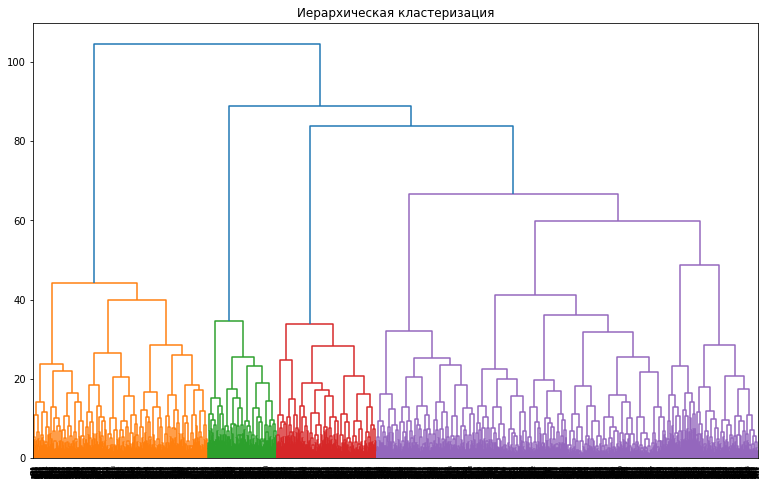

In [15]:
linked = linkage(X_sc, method = 'ward')
plt.figure(figsize=(13, 8))  
dendrogram(linked, orientation='top')
plt.title('Иерархическая кластеризация')
plt.show()

<a id="kmeans"></a>
#### Кластеризации по алгоритму K-Means и прогнозирование кластеров клиентов

In [16]:
km = KMeans(n_clusters = 5, random_state=0) # задаём число кластеров, равное 5, как по условию
labels = km.fit_predict(X_sc) # применяем алгоритм к данным
labels

array([1, 0, 3, ..., 0, 0, 1], dtype=int32)

In [17]:
print('Silhouette_score: {:.2f}'.format(silhouette_score(X_sc, labels)))

Silhouette_score: 0.14


Silhouette_score=0.14, можно сделать вывод, что кластеризация прошла не очень хорошо.

<a id="mean"></a>
#### Средние значения признаков для кластеров

In [21]:
df['cluster_km'] = labels
df.drop('churn', axis=1).groupby('cluster_km').mean().T

cluster_km,0,1,2,3,4
gender,0.502970,0.522078,0.495050,0.485737,0.559666
near_location,0.959406,0.862338,0.000000,1.000000,0.976134
partner,0.783168,0.470130,0.463366,0.350238,0.356802
promo_friends,0.574257,0.306494,0.079208,0.240095,0.230310
phone,1.000000,0.000000,1.000000,1.000000,0.998807
contract_period,10.889109,4.787013,2.352475,1.948494,2.669451
group_visits,0.542574,0.425974,0.215842,0.341521,0.473747
age,29.982178,29.301299,28.477228,28.167987,30.125298
avg_additional_charges_total,160.761016,143.957664,135.457501,131.622204,161.657905
month_to_end_contract,9.954455,4.475325,2.198020,1.856577,2.459427


Характерные признаки кластеров:<br>

Кластер 0:<br>
"partner" - высокая доля 78.3%,<br>
"promo_friends" - имеет сравнительно высокую долю по сравнению с другими кластерами<br>

Кластер 1:<br>
"phone" тех, кто оставил номер 0<br>

Кластер 2:<br>
"near_location" = 0<br>
"promo_friends" = 8%<br>
"group_visits" = 21,6%<br>
Это те клиенты, кто живет не близко и в основном пришел без промо-акции<br>

Кластер 3:<br>
"avg_class_frequency_total" = 1,25<br>
"avg_class_frequency_current_month" = 1,01<br>
Клиенты 3 кластера мало ходят в зал<br>

Кластер 4:<br>
"avg_class_frequency_total" = 2,85<br>
"avg_class_frequency_current_month" = 2,85<br>
Часто помещают зал, примерно 3 раз в неделю<br>

<a id="clasterr"></a>
#### Распределения признаков для кластеров

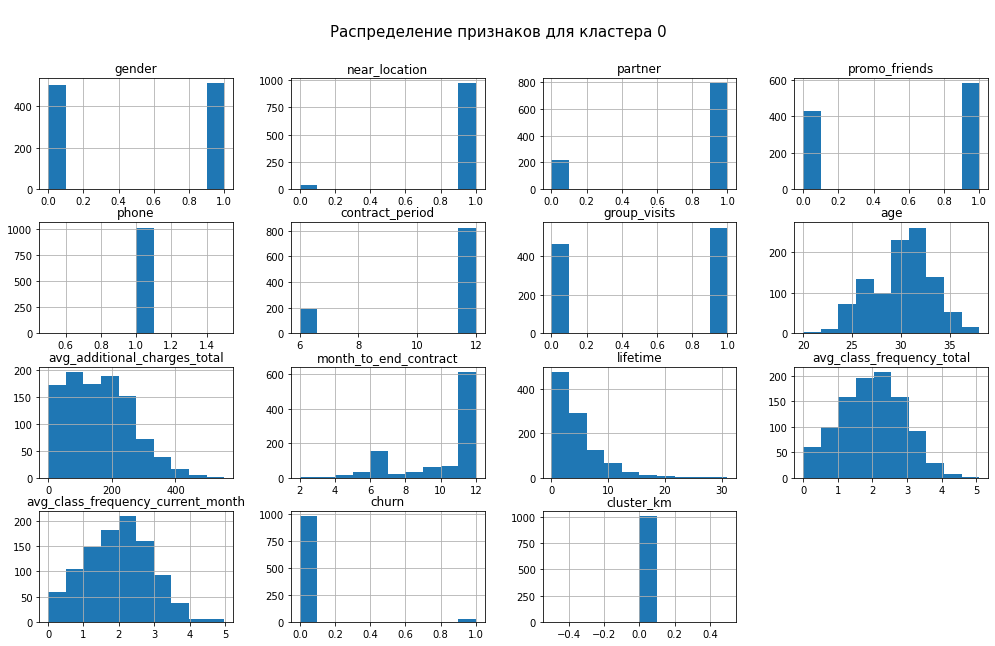

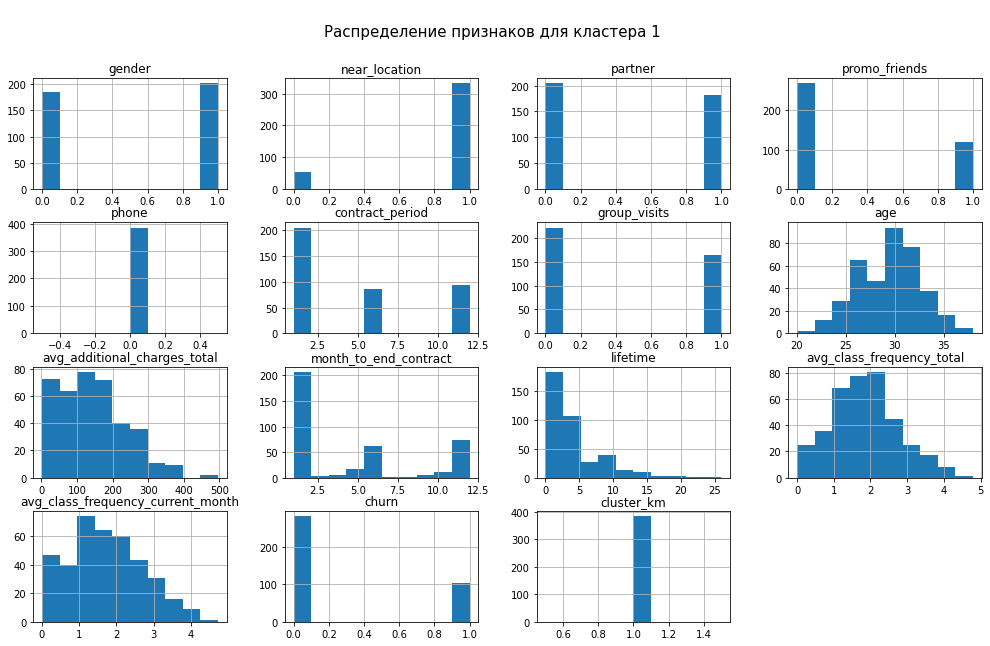

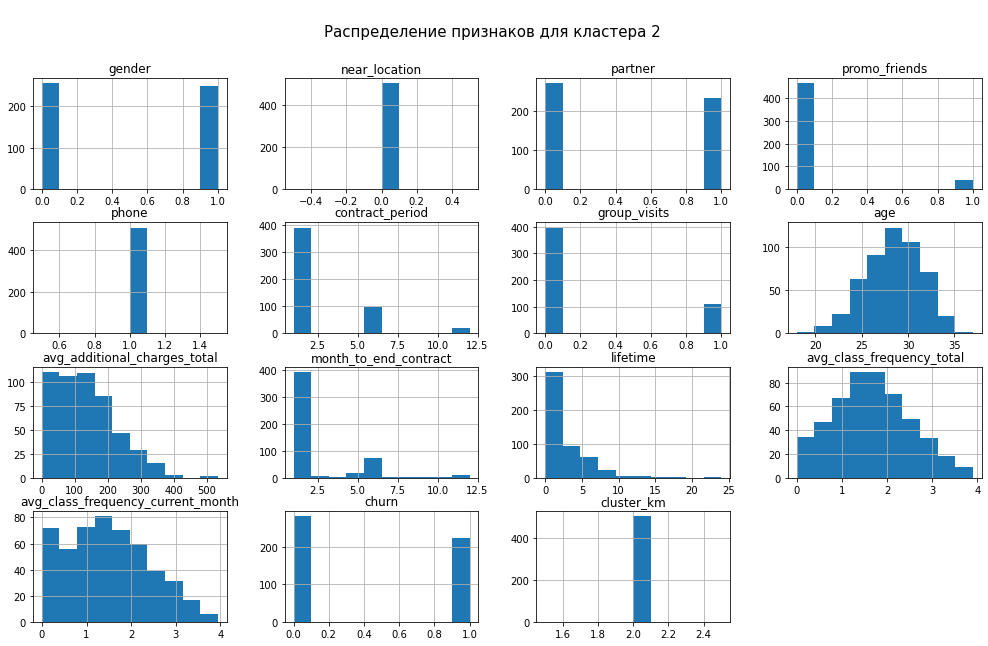

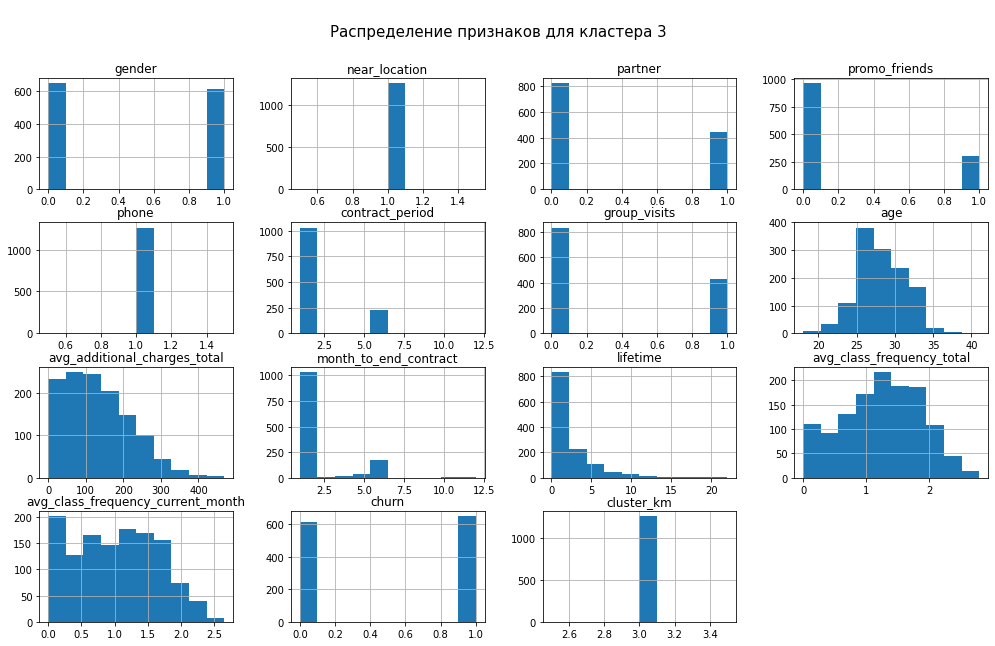

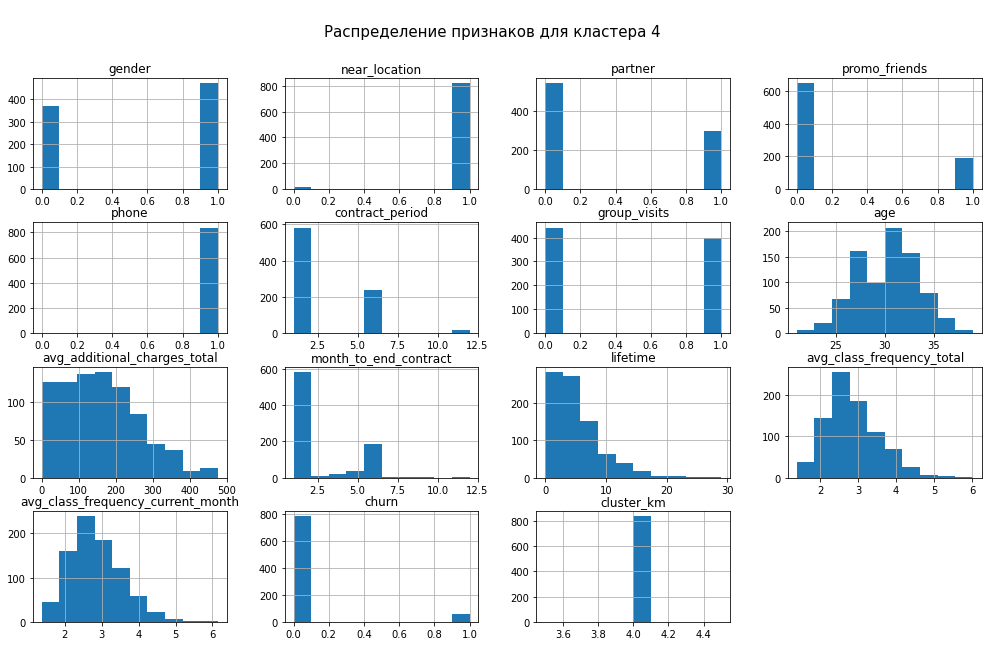

In [22]:
for value in [0, 1, 2, 3, 4]:
    df[df['cluster_km']==value].hist(figsize=(17,10))
    plt.suptitle('\nРаспределение признаков для кластера {}'.format(value), fontsize = 15)
    plt.show()

Из графиков признаков можно выделить следующие особенности:

'contract_period' - видно, что абонементы хорошо продаются на периоды 1,6,12 месяцев.<br>
'age' - в кластер 3 больше клиентов до 30 лет,а в кластере 0 больше 30 лет.<br>
'avg_additional_charges_total' - клиенты с 3 кластера меньше тратят на абонемент, а из 0 кластера больше.<br>
'month_to_end_contract' - у кластера 0 осталось 6 месяцев и больше от абонемента.<br>
'lifetime' - клиенты из 3 кластера ходили 2 и меньше месяцев, а в 0 кластере больше 2 месяцев.<br>
'avg_class_frequency_total' - клиенты кластера 3 ходят в среднем 1 раз в неделю, тогда как клиенты из кластера 0 2-3раза.<br>
'gender' - равномерное распределение<br>
'near_location' - сильно выделяется 2 кластер - те кто живет неблизко<br>
'partner' - клиенты 1 и 3 кластеров не являются партнерами.<br>
'promo_friends' - клиенты кластеров 0 и 4<br>
'phone' - кластер1 - те кто не оставил номер телефона<br>
'group_visits' - клиенты 3 кластера не предпочитают групповые занятия, тогда как клиенты 0 кластера наоборот. 

<a id="distr"></a> 
#### Доли оттока в кластерах

In [23]:
outflow = df.query('churn==1').groupby('cluster_km')['churn'].count() / df.query('churn==1')['churn'].count()
outflow 

cluster_km
0    0.026390
1    0.097078
2    0.211122
3    0.611687
4    0.053723
Name: churn, dtype: float64

Самый большой отток 61,2% у 3 кластера. А также самый маленький отток у 0 (2,64%) и 4 (5,37%) кластеров. Клиенты из 1 кластера, которые не оставляют телефона, склонны продолжать ходить в фитнес. Ко 2 кластеру относятся клиенты, которые живут неблизко и ходят мало, имеют существенный отток - 21,1%.

<a id="recommendation"></a> 
### Выводы и базовые рекомендации по работе с клиентами

Исследование показало, что выгоднее привлекть клиентов, предлагая промо-акции. <br>
Также выгоднее предлагать длительные абонементы на 12 месяцев.<br>
Предлагать участвовать в групповых занятиях.<br>
Целевая аудитория клиенты старше 27 лет.<br>